In [ ]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.4 MB/s eta 0:00:00


In [ ]:
from deap import creator, base, tools, algorithms

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
toolbox = base.Toolbox()
n = 5

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("EstrIndividuo", list, fitness=creator.FitnessMin)

toolbox.register("Genes", np.random.permutation, n)
toolbox.register("Individuos", tools.initIterate, creator.EstrIndividuo, toolbox.Genes)

In [ ]:
toolbox.register("Populacao",tools.initRepeat, list, toolbox.Individuos)

In [ ]:
pop=toolbox.Populacao(n=10)

In [ ]:
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=2)

In [ ]:
dist = [[0,7,9,8,20],
        [7,0,10,4,11],
        [9,10,0,15,5],
        [8,4,15,0,17],
        [20,11,5,17,0]]

In [ ]:
def aptidao(individuo):
  f=0
  for i in range(n - 1):
    local1 = individuo[i]
    local2 = individuo[i+1]
    distancia = dist[local1][local2]
    f = f + distancia

  return f,


In [ ]:
toolbox.register("evaluate", aptidao)

In [ ]:
def estatisticaSalvar(individuo):
  return individuo.fitness.values

In [ ]:
estatistica = tools.Statistics(estatisticaSalvar)
estatistica.register('mean', np.mean)
estatistica.register('min', np.min)
estatistica.register('max', np.max)

In [ ]:
hof = tools.HallOfFame(1)

In [ ]:
result, log = algorithms.eaSimple(pop,
                            toolbox,
                            cxpb=0.8,
                            mutpb=0.1,
                            stats=estatistica,
                            ngen=30,
                            halloffame=hof,
                            verbose=True)

gen	nevals	mean	min	max
0  	0     	25  	25 	25 
1  	10    	25  	25 	25 
2  	9     	28.1	25 	56 
3  	10    	25  	25 	25 
4  	8     	25  	25 	25 
5  	8     	25  	25 	25 
6  	8     	25  	25 	25 
7  	8     	25  	25 	25 
8  	8     	25  	25 	25 
9  	6     	26.1	25 	36 
10 	8     	25.4	25 	29 
11 	6     	25  	25 	25 
12 	10    	25.4	25 	29 
13 	6     	25  	25 	25 
14 	9     	25  	25 	25 
15 	8     	26.4	25 	39 
16 	7     	25  	25 	25 
17 	10    	25  	25 	25 
18 	10    	28.6	25 	44 
19 	6     	25  	25 	25 
20 	7     	25.6	25 	31 
21 	6     	25  	25 	25 
22 	10    	25  	25 	25 
23 	10    	26.7	25 	42 
24 	10    	25  	25 	25 
25 	5     	25  	25 	25 
26 	10    	25  	25 	25 
27 	10    	26.7	25 	42 
28 	8     	25  	25 	25 
29 	5     	28.1	25 	56 
30 	8     	25  	25 	25 


In [ ]:
print(result)

[[4, 2, 0, 1, 3], [4, 2, 0, 1, 3], [4, 2, 0, 1, 3], [4, 2, 0, 1, 3], [4, 2, 0, 1, 3], [4, 2, 0, 1, 3], [4, 2, 0, 1, 3], [4, 2, 0, 1, 3], [4, 2, 0, 1, 3], [4, 2, 0, 1, 3]]


In [ ]:
print(hof)

[[4, 2, 0, 1, 3]]


In [ ]:
melhor = hof[0]
print(aptidao(melhor))

(25,)


In [ ]:
log

[{'gen': 0, 'nevals': 0, 'mean': 25.0, 'min': 25.0, 'max': 25.0},
 {'gen': 1, 'nevals': 10, 'mean': 25.0, 'min': 25.0, 'max': 25.0},
 {'gen': 2, 'nevals': 9, 'mean': 28.1, 'min': 25.0, 'max': 56.0},
 {'gen': 3, 'nevals': 10, 'mean': 25.0, 'min': 25.0, 'max': 25.0},
 {'gen': 4, 'nevals': 8, 'mean': 25.0, 'min': 25.0, 'max': 25.0},
 {'gen': 5, 'nevals': 8, 'mean': 25.0, 'min': 25.0, 'max': 25.0},
 {'gen': 6, 'nevals': 8, 'mean': 25.0, 'min': 25.0, 'max': 25.0},
 {'gen': 7, 'nevals': 8, 'mean': 25.0, 'min': 25.0, 'max': 25.0},
 {'gen': 8, 'nevals': 8, 'mean': 25.0, 'min': 25.0, 'max': 25.0},
 {'gen': 9, 'nevals': 6, 'mean': 26.1, 'min': 25.0, 'max': 36.0},
 {'gen': 10, 'nevals': 8, 'mean': 25.4, 'min': 25.0, 'max': 29.0},
 {'gen': 11, 'nevals': 6, 'mean': 25.0, 'min': 25.0, 'max': 25.0},
 {'gen': 12, 'nevals': 10, 'mean': 25.4, 'min': 25.0, 'max': 29.0},
 {'gen': 13, 'nevals': 6, 'mean': 25.0, 'min': 25.0, 'max': 25.0},
 {'gen': 14, 'nevals': 9, 'mean': 25.0, 'min': 25.0, 'max': 25.0},
 {

In [ ]:
menores = log.select('min')
maiores = log.select('max')
media = log.select('mean')

Text(0, 0.5, 'Aptitud')

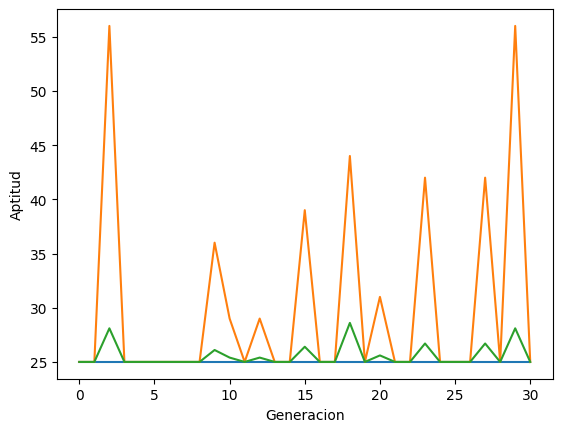

In [ ]:
plt.plot(menores, label="Menores")
plt.plot(maiores, label="Mayores")
plt.plot(media, label="Media")
plt.xlabel("Generacion")
plt.ylabel("Aptitud")